## NLP & Binary Classification: Spam Collection Data
https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

** Dataset Information: **

- a collection of more than 5 thousand SMS phone messages 

** Attribute Information: **

- each line has the correct class followed by the raw message. We offer some examples bellow:

- ham What you doing?how are you?

- ham Ok lar... Joking wif u oni...

- spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop

** Objective of this project **

- predict whether a message is spam or ham

## Data

In [14]:
options(warn=-1)
# Load Data
df_original  <- read.delim('smsspamcollection/SMSSpamCollection', quote = '',
                           stringsAsFactors = FALSE,header=FALSE)
colnames(df_original) = c('label','text')

In [15]:
# Inspect Data
head(df_original)

label,text
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham,U dun say so early hor... U c already then say...
ham,"Nah I don't think he goes to usf, he lives around here though"
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"


In [16]:
dim(df_original)

[1] 5574    2

In [17]:
str(df_original)

'data.frame':	5574 obs. of  2 variables:
 $ label: chr  "ham" "ham" "spam" "ham" ...
 $ text : chr  "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..." "Ok lar... Joking wif u oni..." "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question("| __truncated__ "U dun say so early hor... U c already then say..." ...


In [18]:
summary(df_original)

    label               text          
 Length:5574        Length:5574       
 Class :character   Class :character  
 Mode  :character   Mode  :character  

In [19]:
table(df_original$label)


 ham spam 
4827  747 

In [ ]:
# text mining
library(tm)
library(SnowballC)
corpus = VCorpus(VectorSource(df_original[df_original$label=='spam',]$text))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords())
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)

dtm = TermDocumentMatrix(corpus)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

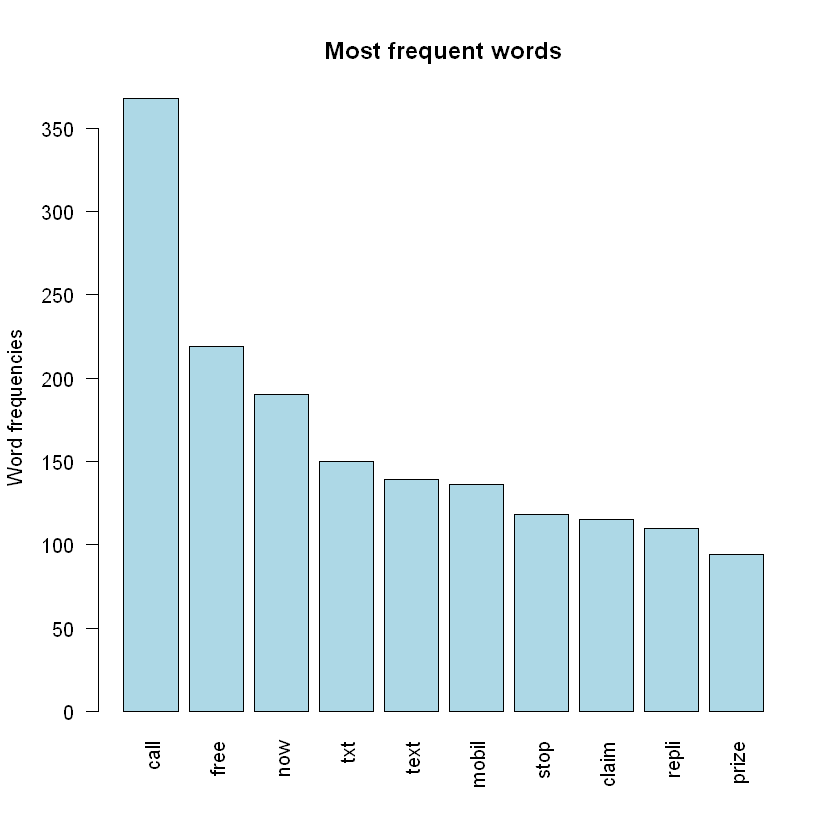

In [45]:
# top 10 spam words
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

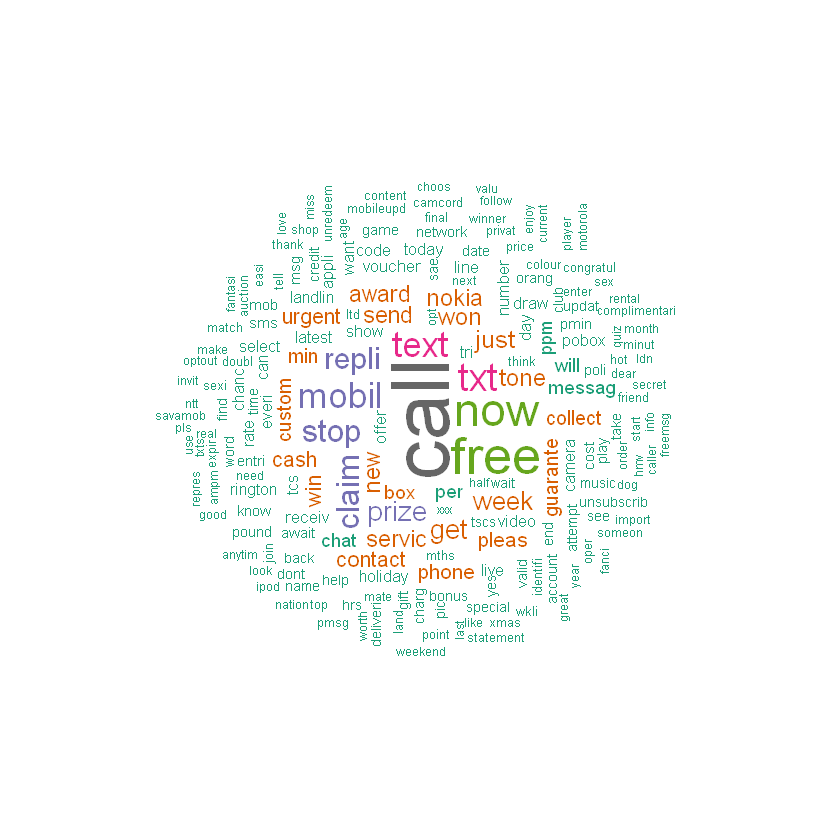

In [46]:
# wordcloud
library(wordcloud)
library(RColorBrewer)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

## Data preprocessing

In [20]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

** Clean Text **

In [21]:
corpus = VCorpus(VectorSource(df_original$text))
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removeNumbers)
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeWords, stopwords())
corpus = tm_map(corpus, stemDocument)
corpus = tm_map(corpus, stripWhitespace)

** Creat Bag-Of-Words model **

In [6]:
dtm = DocumentTermMatrix(corpus)
dtm = removeSparseTerms(dtm, 0.999)
df = as.data.frame(as.matrix(dtm))
dim(df)
df$label = df_original$label
dim(df)

[1] 5574 1209

[1] 5574 1210

** Encode label **

In [51]:
df$label = factor(df$label,
                  levels = c('spam', 'ham'),
                  labels = c(0, 1))
label_col = 1210                          

** Split Train Test Sets **

In [53]:
split = sample.split(df$label, SplitRatio = 0.80)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

## Model Train /  Evaluation

In [59]:
# Fit randomForest to the Test set
library(randomForest)
model = randomForest(x = train_set[-label_col],
                     y = train_set$label,
                     ntree = 100)

In [62]:
# Make predictions
predictions = predict(model, newdata = test_set[-label_col])
# Evaluate the results
confusionMatrix(predictions, test_set$label)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 120   6
         1  29 959
                                         
               Accuracy : 0.9686         
                 95% CI : (0.9566, 0.978)
    No Information Rate : 0.8662         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8549         
 Mcnemar's Test P-Value : 0.0002003      
                                         
            Sensitivity : 0.8054         
            Specificity : 0.9938         
         Pos Pred Value : 0.9524         
         Neg Pred Value : 0.9706         
             Prevalence : 0.1338         
         Detection Rate : 0.1077         
   Detection Prevalence : 0.1131         
      Balanced Accuracy : 0.8996         
                                         
       'Positive' Class : 0              
                                         